In [3]:
import torch # YOLOv5 implemented using pytorch


In [2]:
from IPython.display import Image #this is to render predictions


In [3]:
%cd yolov5

c:\Users\Wazon\Desktop\code\python\inz\yolov5


In [1]:
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement cudatoolkit==11.1.1 (from versions: none)
ERROR: No matching distribution found for cudatoolkit==11.1.1


In [5]:
from tqdm import tqdm

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.__version__

'1.8.0'

In [8]:
#!python detect.py --source 0
# detekcja na podstawie defaultowych wag i klas z kamerki

In [16]:
!python train.py --batch-size 16 --data dataset.yaml --weights yolov5s.pt --workers 2 --epochs 200
#--workers WAZNE!!! przy defaultowym (8) zrzuca na ram kilkanaście gb na raz (8x~3gb)

^C


github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-12-9 Python-3.9.15 torch-1.8.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.

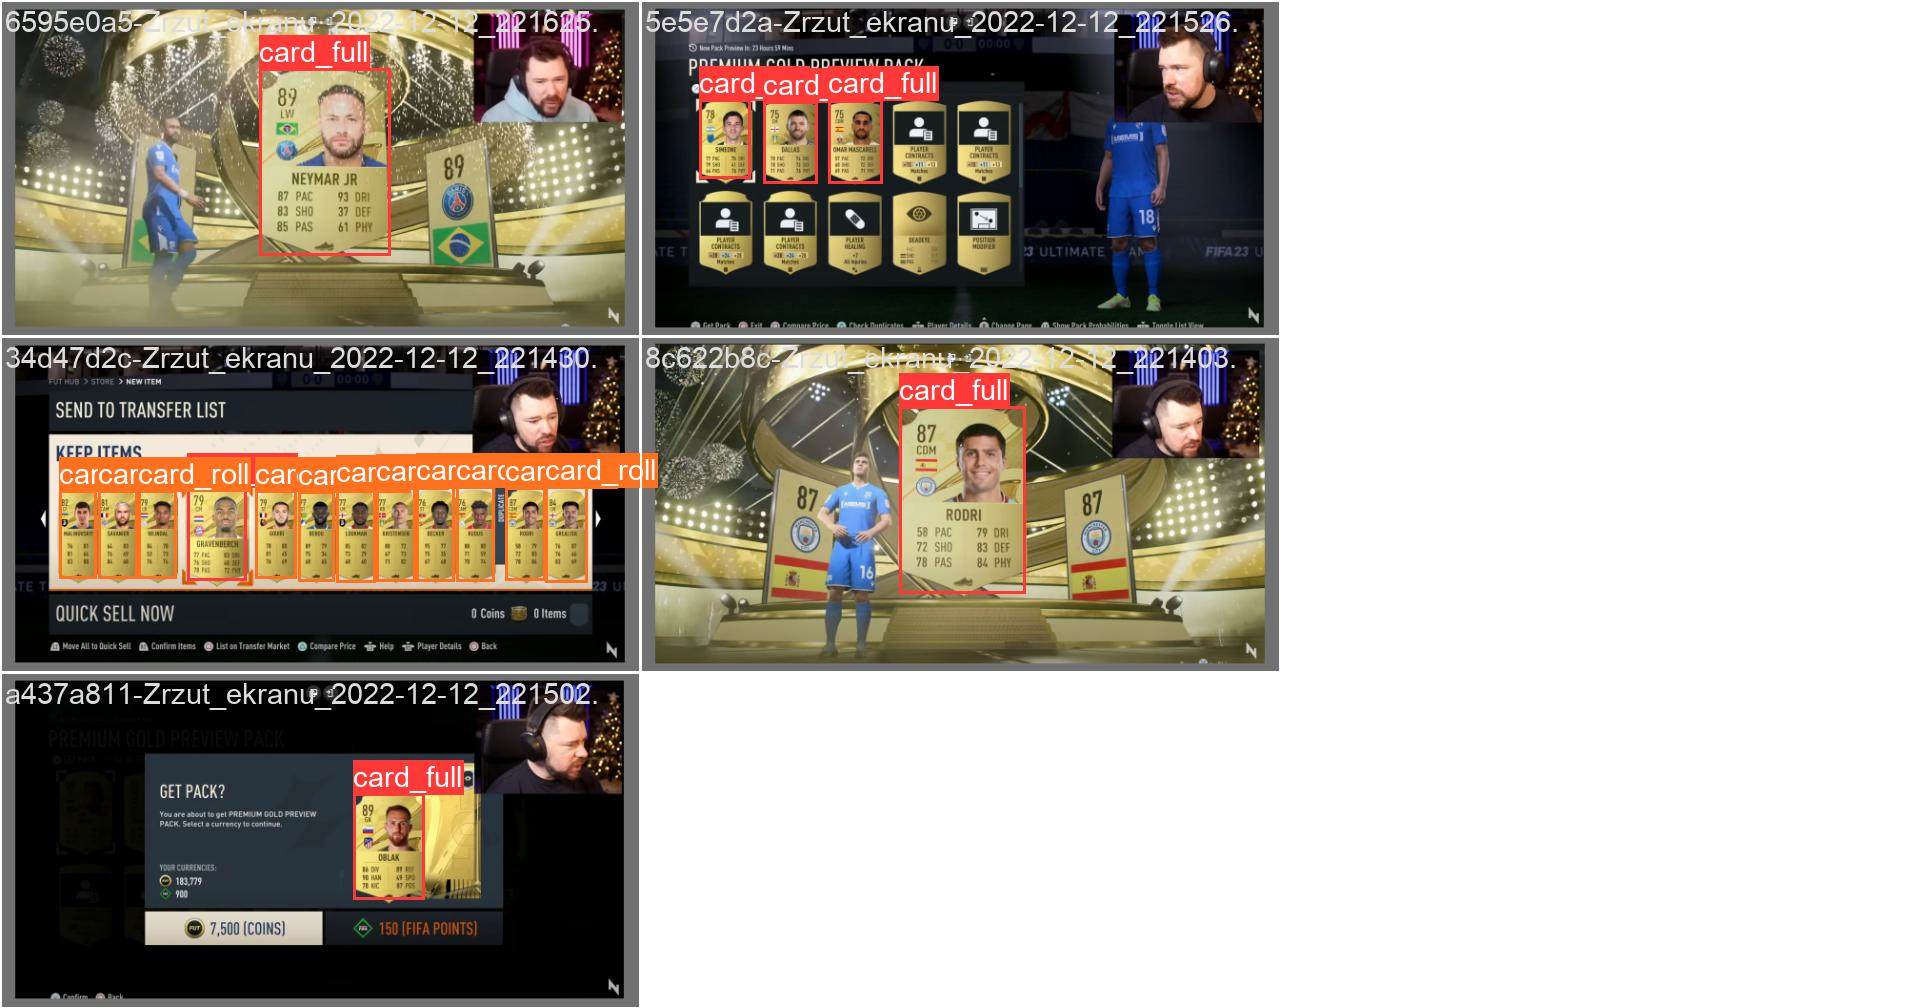

In [17]:
Image(filename='runs/train/exp8/val_batch0_labels.jpg', width=1000)

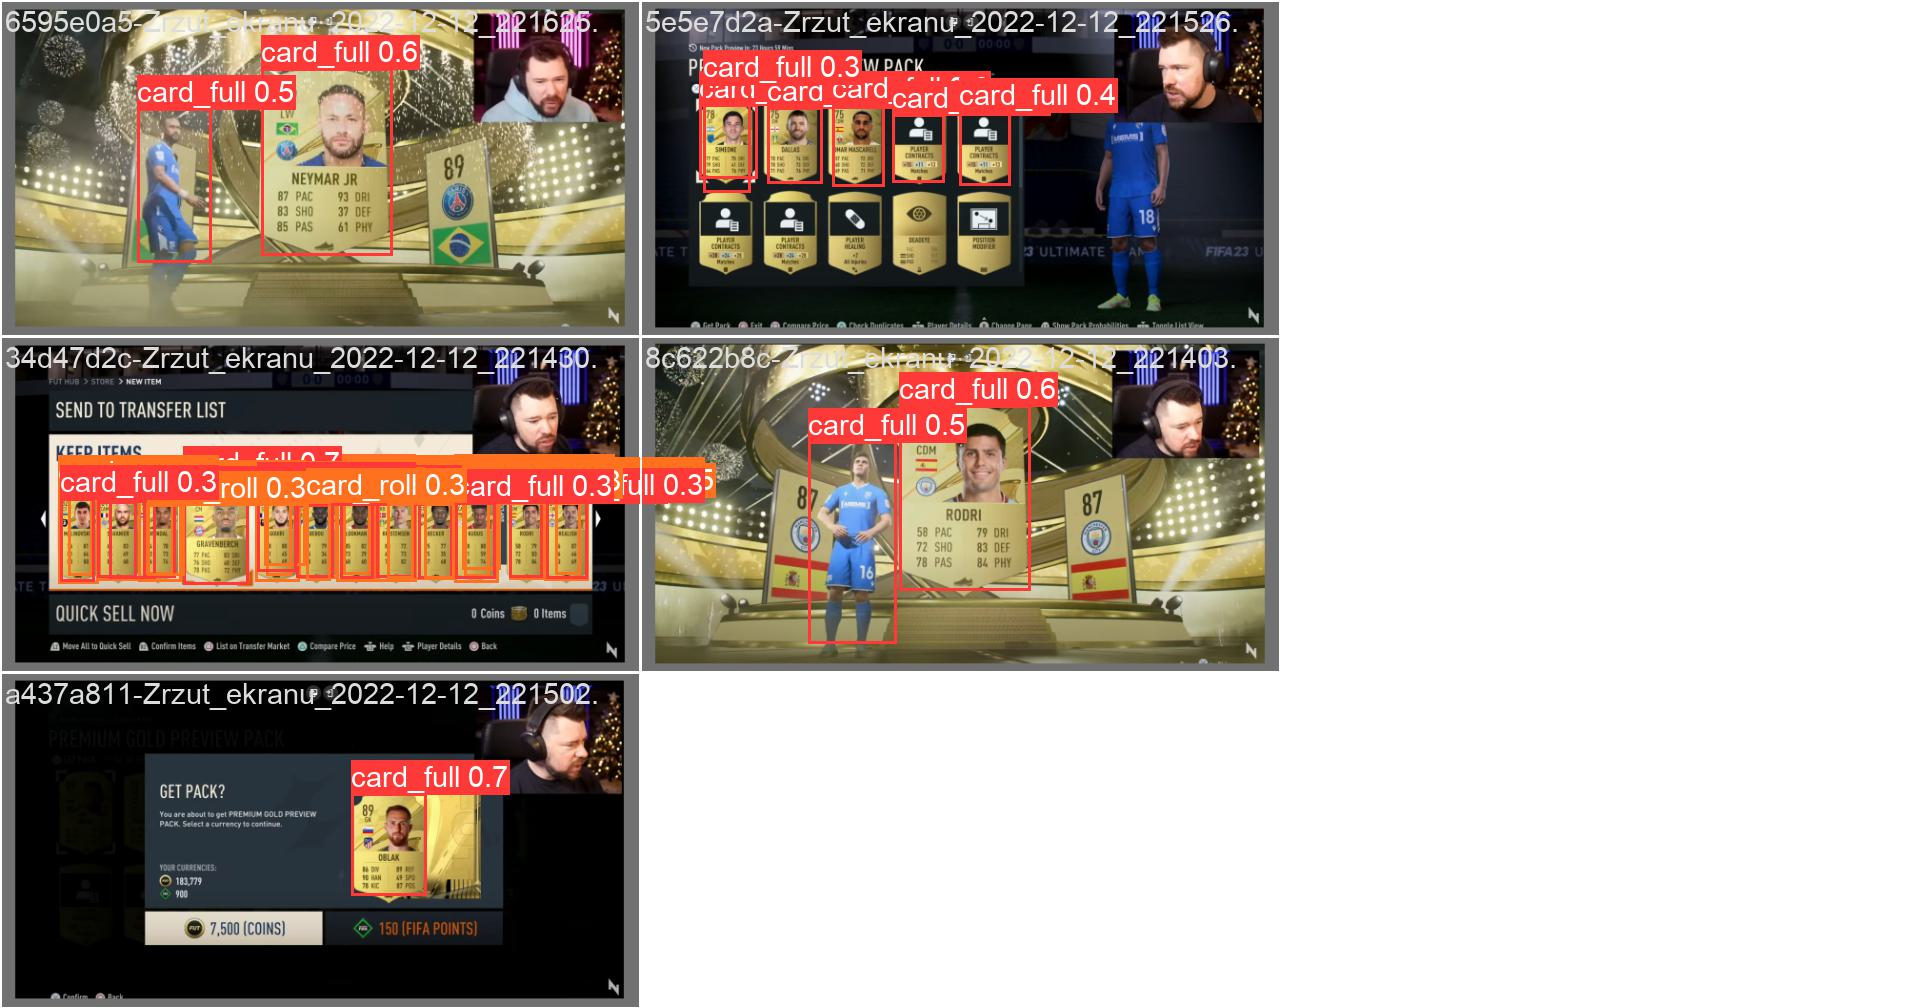

In [18]:
Image(filename='runs/train/exp8/val_batch0_pred.jpg', width=1000)

In [20]:
!python detect.py --weights runs/train/exp9/weights/best.pt --img 416 --conf 0.7 --source ../dataset/val/images --save-crop --save-txt

detect: weights=['runs/train/exp9/weights/best.pt'], source=../dataset/val/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2022-12-9 Python-3.9.15 torch-1.8.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 C:\Users\Wazon\Desktop\code\python\inz\dataset\val\images\34d47d2c-Zrzut_ekranu_2022-12-12_221430.png: 224x416 1 card_full, 11 card_rolls, 8.0ms
image 2/5 C:\Users\Wazon\Desktop\code\python\inz\dataset\val\images\5e5e7d2a-Zrzut_ekranu_2022-12-12_221526.png: 224x416 (no detections), 8.0ms
image 3/5 C:\Users\Wazon\Desktop\code\python\i

In [ ]:
#detekcja kart z kamerki
#python detect.py --source 0 --weights runs/train/exp11/weights/best.pt --conf 0.7

In [8]:
import easyocr
import cv2
import numpy as np
import pandas as pd
import re

In [20]:
import os

found_files_card_full = []
found_files_card_roll = []

path_of_the_directory = r'C:\Users\Wazon\Desktop\code\python\inz\yolov5\runs\detect\exp15\crops\card_full'
ext = ('.jpg','.png')
for files in os.listdir(path_of_the_directory):
    if files.endswith(ext):
        print(files)
        found_files_card_full.append(files)  
    else:
        continue

path_of_the_directory = r'C:\Users\Wazon\Desktop\code\python\inz\yolov5\runs\detect\exp15\crops\card_roll'
ext = ('.jpg','.png')
for files in os.listdir(path_of_the_directory):
    if files.endswith(ext):
        print(files)
        found_files_card_roll.append(files)  
    else:
        continue

print(found_files_card_full)
print(found_files_card_roll)

34d47d2c-Zrzut_ekranu_2022-12-12_221430.jpg
6595e0a5-Zrzut_ekranu_2022-12-12_221625.jpg
8c622b8c-Zrzut_ekranu_2022-12-12_221403.jpg
a437a811-Zrzut_ekranu_2022-12-12_221502.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_221430.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_22143010.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_22143011.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214302.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214303.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214304.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214305.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214306.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214307.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214308.jpg
34d47d2c-Zrzut_ekranu_2022-12-12_2214309.jpg
['34d47d2c-Zrzut_ekranu_2022-12-12_221430.jpg', '6595e0a5-Zrzut_ekranu_2022-12-12_221625.jpg', '8c622b8c-Zrzut_ekranu_2022-12-12_221403.jpg', 'a437a811-Zrzut_ekranu_2022-12-12_221502.jpg']
['34d47d2c-Zrzut_ekranu_2022-12-12_221430.jpg', '34d47d2c-Zrzut_ekranu_2022-12-12_22143010.jpg', '34d47d2c-Zrzut_ekranu_2022-12-12_22143011

In [21]:
reader = easyocr.Reader(['en'], gpu = True)

found_text_card_full = []
found_text_card_roll = []

for file in found_files_card_full :
    img = cv2.imread(r"C:\Users\Wazon\Desktop\code\python\inz\yolov5\runs\detect\exp15\crops\card_full\{}".format(file))
    results = reader.readtext(img, detail=0)
    found_text_card_full.append(results)

print(*found_text_card_full,sep='\n')

for file in found_files_card_roll :
    img = cv2.imread(r"C:\Users\Wazon\Desktop\code\python\inz\yolov5\runs\detect\exp15\crops\card_roll\{}".format(file))
    results = reader.readtext(img, detail=0)
    found_text_card_roll.append(results)

print(*found_text_card_roll,sep='\n')

['79', 'GRAVENBERCH', '77 Pac', '83 DRI', '76 SHO', '68 DEF', '78 PaS', '72 PHY']
['89', 'LW', 'NEYMAR JR', '87   PAC', '93  DRI', '83   SHO', '37  DEF', '85   PAS', '61 PHY']
['87', 'CDM', 'RODRI', '58   PAC', '79   DRI', '72   SHO', '83   DEF', '78   PAS', '84 PHY']
['89', 'OBLAK', '86 DIV', 'REF', '90 HAN', '49 SPD', '78 KIC', 'POS']
['GQuIRI']
['77', 'LOOKMAM']
['KRISTENSEM']
['BEBOU']
['SAVANIER']
['36', 'BECKER']
['GREALISH']
['82', 'MALINOVSKYI']
['CDM', 'RODRI']
['78', 'WIJNOAL']
['CAM', 'KuDUS']


In [56]:
EASY_OCR = easyocr.Reader(['en'], gpu = True)

OCR_TH = 0.2

def recognize_card_easyocr(img, coords, reader, region_threshold):
    #separate coordinates from box
    xmin, ymin, xmax, ymax = coords
    ncard = img[int(ymin):int(ymax), int(xmin):int(xmax)] #croped card


    ocr_result = reader.readtext(ncard, detail=0)
    text = ocr_result
    
    filtered_text = []

    for i in range(len(text)):
        #regex = re.match("^[a-zA-Z_ ]+$", str(text[i]))
        regex = re.match("^[a-zA-Z_ ].{4,}$", str(text[i]))
        if regex != None:
            print("FOUND: ", text[i])
            filtered_text.append(text[i])

    return filtered_text


In [10]:
def secret2(m):
    with open(m) as infile:
        print(''.join(line[2:] for line in infile if line))

secret2('C:/Users/Wazon/Desktop/code/python/inz/yolov5/runs/detect/exp15/labels/8c622b8c-Zrzut_ekranu_2022-12-12_221403.txt')

0.507463 0.491018 0.204242 0.571856



In [9]:
import torch
model = torch.hub.load('..', 'custom', 'best.pt', source='local')
classes = model.names

YOLOv5  2022-12-9 Python-3.9.15 torch-1.8.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [40]:
def detect_cards(frame, model):
    frame = [frame]
    results = model(frame)
    results.show()
    print(results.xyxyn[0])
    print(results.xyxyn[0][:, -1])
    print(results.xyxyn[0][:, :-1])

    labels, coordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
    #print(labels, "\n", coordinates)
    return labels, coordinates

In [49]:
def plot_boxes(results, frame, classes):
    #results: labels and coordinates predicted for the given frame
    #classes: contains labels
    
    labels, cord = results
    n = len(labels)
    x_shape, y_shape = frame.shape[1], frame.shape[0]

    card_text = []
    #looping through the detections
    for i in range(n):
        row = cord[i]
        if row[4] >= 0.50: #threshold value for detection, discards everything below this value
            x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape) #BBox coordniates
            text_d = classes[int(labels[i])]

            coords = [x1,y1,x2,y2]
            
            card_text.append(recognize_card_easyocr(img = frame, coords= coords, reader= EASY_OCR, region_threshold= OCR_TH))

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) #BBox
            cv2.rectangle(frame, (x1, y1-20), (x2, y1), (0, 255,0), -1) #for text label background
            cv2.putText(frame, f"{card_text}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255), 2)

    print(card_text)
    return frame

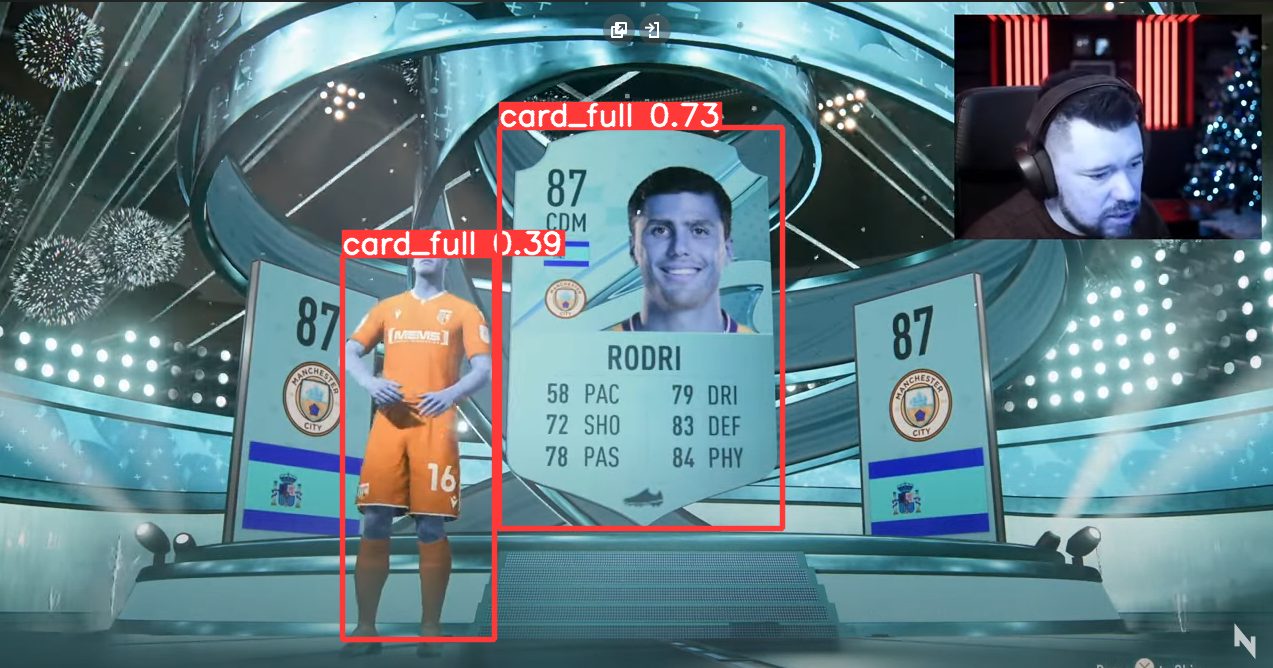

tensor([[0.39277, 0.19117, 0.61508, 0.79062, 0.72901, 0.00000],
        [0.26867, 0.38223, 0.38839, 0.95777, 0.38720, 0.00000]], device='cuda:0')
tensor([0., 0.], device='cuda:0')
tensor([[0.39277, 0.19117, 0.61508, 0.79062, 0.72901],
        [0.26867, 0.38223, 0.38839, 0.95777, 0.38720]], device='cuda:0')
FOUND:  RODRI
[['RODRI']]


In [57]:
frame = cv2.imread('C:/Users/Wazon/Desktop/code/python/inz/dataset/val/images/8c622b8c-Zrzut_ekranu_2022-12-12_221403.png')
results = detect_cards(frame, model = model)
final_product = plot_boxes(results, frame, classes = classes)

In [7]:
import re

key = re.search("[a-zA-Z-]{3,}", '/en/fifa23/player/alisson/42').group(1)
#if key is not "fifa" or "player":
print(key)

<re.Match object; span=(4, 8), match='fifa'>
